### 为什么要使用降维算法？

为了避免遗漏信息，需要获取尽可能多的特征变量，但是过多的变量又加剧了问题的复杂性。

由于多种变量都是对同一事物的反映，变量之间经常会存在一定的相关性，这就造成大量的信息重复、重叠，有时会淹没甚至扭曲事物的真正特征与内在规律。

因此，我们希望数据分析中涉及的变量较少，而得到的信息量又较多。这就需要通过降维方法，在减少需要分析的变量数量的同时，尽可能多的保留众多原始变量所包含的有效信息。

### 降维前的数据处理过程

In [3]:
# 获得当前工作路径
import os
import pandas as pd
import numpy as np
os.getcwd()    
# 修改当前工作目录
os.chdir('/Users/zhangjinwei/Desktop/工作期间/皖/')
# 检查当前工作路径
os.getcwd()

df = pd.read_csv("检验指标.csv", header=2).drop([0,1],axis=0)

print(df.shape)
df.head(8)

(480, 11)


,项目批号,外观,挥发分（%）,羟基含量(%),熔融指数（g/10min）,堆积密度（g/ml）,游离酸（%）,粘 度 cp/20℃,乙酰基（%）,缩丁醛基（%）,检验日期
2,1# 8.31(16:30),符合,0.9,18,1.45,0.196,0.0022,209,1.92,77.2,2022.8.31
3,2# 8.31(16:30),符合,1.2,17.9,1.4,0.195,0.0022,206,1.95,77.4,2022.8.31
4,3# 8.31(16:30),符合,0.9,17.9,1.45,0.194,0.0022,202,2.01,77.5,2022.8.31
5,4# 8.31(16:30),符合,0.8,17.8,1.46,0.195,0.0027,203,2,77.4,2022.8.31
6,1# 8.31(20:00),符合,0.8,18,1.49,0.195,0.0022,211,1.96,77.4,2022.8.31
7,2# 8.31(20:00),符合,1,17.9,1.44,0.195,0.0022,209,1.96,77.5,2022.8.31
8,3# 8.31(20:00),符合,0.8,17.9,1.39,0.193,0.0022,212,1.95,77.2,2022.8.31
9,4# 8.31(20:00),符合,0.8,18,1.5,0.194,0.0022,210,1.97,77.5,2022.8.31


In [4]:
df.columns

Index(['项目批号', '外观', '挥发分（%）', '羟基含量(%)', '熔融指数（g/10min）', '堆积密度（g/ml）',
       '游离酸（%）', '粘 度 cp/20℃', '乙酰基（%）', '缩丁醛基（%）', '检验日期'],
      dtype='object')

In [5]:
data1 = df.drop(["项目批号","外观","检验日期"],axis=1 )
data1

,挥发分（%）,羟基含量(%),熔融指数（g/10min）,堆积密度（g/ml）,游离酸（%）,粘 度 cp/20℃,乙酰基（%）,缩丁醛基（%）
2,0.9,18,1.45,0.196,0.0022,209,1.92,77.2
3,1.2,17.9,1.4,0.195,0.0022,206,1.95,77.4
4,0.9,17.9,1.45,0.194,0.0022,202,2.01,77.5
5,0.8,17.8,1.46,0.195,0.0027,203,2,77.4
6,0.8,18,1.49,0.195,0.0022,211,1.96,77.4
...,...,...,...,...,...,...,...,...
477,0.8,18.2,1.48,0.206,0.0022,218,1.82,76.9
478,0.9,18.3,1.57,0.215,0.0022,212,1.85,77
479,1,18.2,1.65,0.207,0.0027,212,1.85,76.9
480,0.8,18.5,1.45,0.214,0.0022,223,1.83,76.9


In [6]:
data1.fillna(axis=0, method='bfill',inplace=True)
data1.isna().sum()

挥发分（%）           0
羟基含量(%)          0
熔融指数（g/10min）    0
堆积密度（g/ml）       0
游离酸（%）           0
粘 度 cp/20℃       0
乙酰基（%）           0
缩丁醛基（%）          0
dtype: int64

In [5]:
data1.describe()

,挥发分（%）,羟基含量（%）,熔融指数（g/10min）,堆积密度（g/ml）,游离酸（%）,粘 度 cp/20℃,乙酰基（%）,缩丁醛基（%）
count,480,480,480,480,480,480,480,480
unique,6,15,66,31,2,36,31,16
top,0.8,18.2,1.36,0.2,0.0022,217,1.87,76.8
freq,174,69,24,74,294,46,47,95


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 2 to 481
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   挥发分（%）         480 non-null    object
 1   羟基含量（%）        480 non-null    object
 2   熔融指数（g/10min）  480 non-null    object
 3   堆积密度（g/ml）     480 non-null    object
 4   游离酸（%）         480 non-null    object
 5   粘 度 cp/20℃     480 non-null    object
 6   乙酰基（%）         480 non-null    object
 7   缩丁醛基（%）        480 non-null    object
dtypes: object(8)
memory usage: 30.1+ KB


In [7]:
data1.head(30)

,挥发分（%）,羟基含量(%),熔融指数（g/10min）,堆积密度（g/ml）,游离酸（%）,粘 度 cp/20℃,乙酰基（%）,缩丁醛基（%）
2,0.9,18,1.45,0.196,0.0022,209,1.92,77.2
3,1.2,17.9,1.4,0.195,0.0022,206,1.95,77.4
4,0.9,17.9,1.45,0.194,0.0022,202,2.01,77.5
5,0.8,17.8,1.46,0.195,0.0027,203,2,77.4
6,0.8,18,1.49,0.195,0.0022,211,1.96,77.4
7,1,17.9,1.44,0.195,0.0022,209,1.96,77.5
8,0.8,17.9,1.39,0.193,0.0022,212,1.95,77.2
9,0.8,18,1.5,0.194,0.0022,210,1.97,77.5
10,0.8,18,1.45,0.197,0.0022,202,1.97,77.1
11,0.8,17.9,1.43,0.198,0.0027,194,2.01,77.2


In [87]:
# data1.to_csv("wanweishuju.csv",encoding="utf_8_sig")

In [30]:
data5 = pd.read_csv("wanweishuju.csv").drop(["Unnamed: 0"],axis=1)
data5

,挥发分,羟基含量,熔融指数,堆积密度,游离酸,粘 度,乙酰,缩丁醛基
0,0.9,18.0,1.45,0.196,0.0022,209,1.92,77.2
1,1.2,17.9,1.40,0.195,0.0022,206,1.95,77.4
2,0.9,17.9,1.45,0.194,0.0022,202,2.01,77.5
3,0.8,17.8,1.46,0.195,0.0027,203,2.00,77.4
4,0.8,18.0,1.49,0.195,0.0022,211,1.96,77.4
...,...,...,...,...,...,...,...,...
475,0.8,18.2,1.48,0.206,0.0022,218,1.82,76.9
476,0.9,18.3,1.57,0.215,0.0022,212,1.85,77.0
477,1.0,18.2,1.65,0.207,0.0027,212,1.85,76.9
478,0.8,18.5,1.45,0.214,0.0022,223,1.83,76.9


### 降维算法--因子分析

因子分析是一种旨在寻找隐藏在多变量数据中、无法直接观察到却影响或支配可测变量的潜在因子、并估计潜在因子对可测变量的影响程度，以及潜在因子之间的相关性的一种多元统计分析方法。
最早由英国心理学家C.E.斯皮尔曼提出。他发现学生的各科成绩之间存在着一定的相关性，一科成绩好的学生，往往其他各科成绩也比较好，从而推想是否存在某些潜在的共性因子，或称某些一般智力条件影响着学生的学习成绩。

实现思想
根据相关性大小把变量分组，使得同组内的变量之间相关性较高，但不同组的变量不相关或相关性较低，每组变量代表一个基本结构一即公共因子。

因子分析的标准化处理

In [32]:
# 标准化处理
from sklearn.preprocessing import StandardScaler
data6 = StandardScaler().fit_transform(data5) 
data7 = pd.DataFrame(data6)
data7

,0,1,2,3,4,5,6,7
0,-0.309937,-1.594575,0.617429,-1.249097,-0.795395,-0.576410,0.518130,1.744704
1,1.709560,-1.991359,0.217906,-1.437818,-0.795395,-0.851346,1.059573,2.597512
2,-0.309937,-1.991359,0.617429,-1.626539,-0.795395,-1.217926,2.142457,3.023916
3,-0.983102,-2.388142,0.697334,-1.437818,1.257237,-1.126281,1.961976,2.597512
4,-0.983102,-1.594575,0.937048,-1.437818,-0.795395,-0.393120,1.240053,2.597512
...,...,...,...,...,...,...,...,...
475,-0.983102,-0.801007,0.857143,0.638113,-0.795395,0.248397,-1.286677,0.465491
476,-0.309937,-0.404223,1.576284,2.336602,-0.795395,-0.301474,-0.745235,0.891895
477,0.363229,-0.801007,2.215521,0.826834,1.257237,-0.301474,-0.745235,0.465491
478,-0.983102,0.389344,0.617429,2.147881,-0.795395,0.706623,-1.106197,0.465491


因子分析前的检验

主要用的到的方法是KMO和Bartlett球形检验，其中Bartlett球形检验用于检验变量之间是否相关独立，如果p值小于0.05则适合做因子分析；
KMO用于检验变量之间的相关性取值在0-1之间，值越大相关性越强。


In [33]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
kmo = calculate_kmo(data7)
bartlett = calculate_bartlett_sphericity(data7)
if kmo[1] >= 0.7 and bartlett[1] <= 0.05:  #kmo值要大于0.7, bartlett球形度检验p值要小于0.05 
    print("\n因子分析适用性检验通过\n")
else:
    print("\n因子分析适用性检验未通过\n")
print('kmo:{},bartlett:{}'.format(kmo[1], bartlett[1]))


因子分析适用性检验未通过

kmo:0.6590238198608995,bartlett:8.329818745550807e-100


因子分析过程

旋转前

In [35]:
Load_Matrix = FactorAnalyzer(rotation=None, n_factors=len(data6.T), method='principal')
Load_Matrix.fit(data6)
f_contribution_var = Load_Matrix.get_factor_variance()
matrices_var = pd.DataFrame()
matrices_var["旋转前特征值"] = f_contribution_var[0]
matrices_var["旋转前方差贡献率"] = f_contribution_var[1]
matrices_var["旋转前方差累计贡献率"] = f_contribution_var[2]
print(matrices_var)#旋转前的特征值、方差贡献等
print(Load_Matrix.loadings_)#旋转前的成分矩阵

     旋转前特征值  旋转前方差贡献率  旋转前方差累计贡献率
0  2.360252  0.295032    0.295032
1  1.297029  0.162129    0.457160
2  1.025538  0.128192    0.585352
3  0.945494  0.118187    0.703539
4  0.843188  0.105399    0.808938
5  0.653388  0.081674    0.890611
6  0.484456  0.060557    0.951168
7  0.390655  0.048832    1.000000
[[ 0.39736372  0.70005277 -0.05607237 -0.29960585  0.04069944  0.39064805
  -0.30691733  0.10324644]
 [-0.77811039  0.35219394  0.01091833  0.02016137 -0.09841999 -0.14456307
   0.13456214  0.47041047]
 [ 0.71609232  0.39744272 -0.0465597  -0.07045121  0.11314916 -0.01684418
   0.55577301 -0.01223919]
 [ 0.12449232  0.45875088  0.3216889   0.80359307  0.06218961 -0.07506467
  -0.10142841 -0.07080778]
 [-0.03144589 -0.07220709  0.9323395  -0.2644366  -0.19008589  0.11497558
   0.07187636 -0.00976657]
 [-0.66624173 -0.12005319 -0.02971745  0.19076904  0.31706224  0.60195312
   0.19422725 -0.06191111]
 [ 0.53449107 -0.34296809 -0.1268224   0.30562813 -0.58567474  0.3132949
   0.04635534  


相关矩阵特征值： [2.36025202 1.29702938 1.02553793 0.94549355 0.84318819 0.6533884
 0.48445588 0.39065464]


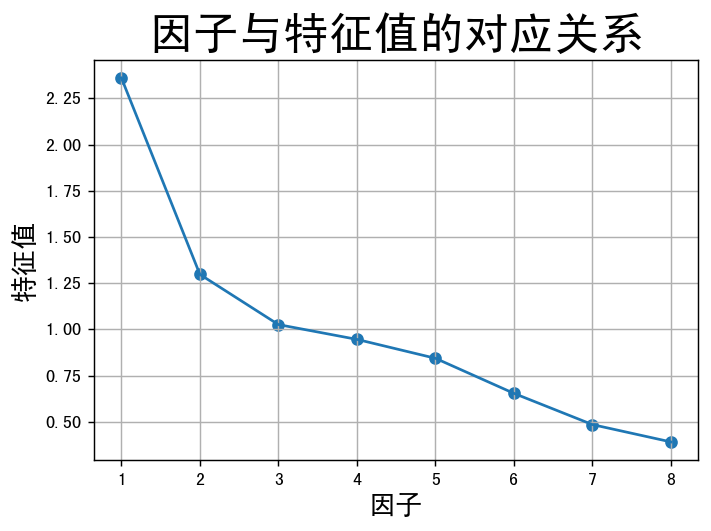

In [66]:
# 对于特征根还可以画图参考，这个图好像作用不太大，主要可能更加直观。一般因子提取的方式是使用主成分分析的方法。
import matplotlib

# 用来正常显示中文标签 ，亲测可用
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

# 主要用来看取多少因子合适，一般是取到平滑处左右，当然还要需要结合贡献率
ev, v = Load_Matrix.get_eigenvalues()
print('\n相关矩阵特征值：', ev)
plt.figure(figsize=(6, 4), dpi=130)
plt.scatter(range(1, data6.shape[1] + 1), ev)
plt.plot(range(1, data6.shape[1] + 1), ev)
plt.title('因子与特征值的对应关系', fontdict={'weight': 'normal', 'size': 25})
plt.xlabel('因子', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('特征值', fontdict={'weight': 'normal', 'size': 15})
plt.grid()
plt.show()

In [37]:
# 共因子个数选择，对于公因子的个数选择一般会按照特征根大于1的标准或者累计贡献率设置一个值，本文使用前者作为参考：
eigenvalues = 1
N = 0
for c in matrices_var["旋转前特征值"]:
    if c >= eigenvalues:
        N += 1
    else:
        s = matrices_var["旋转前方差累计贡献率"][N-1]
        print("\n选择了" + str(N) + "个因子累计贡献率为" + str(s)+"\n")
        break


选择了3个因子累计贡献率为0.5853524173510338



旋转后

In [26]:
Load_Matrix_rotated = FactorAnalyzer(rotation='varimax', n_factors=5, method='principal')
Load_Matrix_rotated.fit(data6)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

In [38]:
data6_contribution_var_rotated = Load_Matrix_rotated.get_factor_variance()
matrices_var_rotated = pd.DataFrame()
matrices_var_rotated["特征值"] = data6_contribution_var_rotated[0]
matrices_var_rotated["方差贡献率"] = data6_contribution_var_rotated[1]
matrices_var_rotated["方差累计贡献率"] = data6_contribution_var_rotated[2]
print("旋转后的载荷矩阵的贡献率")
print(matrices_var_rotated)
print("旋转后的成分矩阵")
print(Load_Matrix_rotated.loadings_)

旋转后的载荷矩阵的贡献率
        特征值     方差贡献率   方差累计贡献率
0  1.684086  0.187121  0.187121
1  1.660549  0.184505  0.371626
2  1.650594  0.183399  0.555025
3  1.013710  0.112634  0.667660
4  1.071358  0.119040  0.786700
旋转后的成分矩阵
[[-1.01539612e-01  8.46577382e-01  1.29207446e-01  9.04512139e-02
   2.67278918e-01]
 [ 8.44178020e-01  6.22957108e-02 -1.63123204e-01 -3.17793927e-02
   4.15146444e-03]
 [-2.53404098e-01  3.75025385e-01 -7.27027834e-01 -7.54221500e-04
   7.04822761e-02]
 [ 7.49512937e-01 -7.21572687e-02  3.02432478e-01 -9.15682318e-02
   1.45453846e-01]
 [ 9.69896471e-02  5.39460019e-02 -3.04919813e-02  9.44517868e-03
   9.71900037e-01]
 [-1.53826306e-02  5.80747481e-02  5.57535808e-03  9.87377807e-01
   1.10769011e-02]
 [-5.69707269e-01  2.51890059e-01 -3.03435713e-01 -1.45034718e-01
   2.16652669e-03]
 [ 1.82060398e-02 -8.45782104e-01  2.57002578e-01  6.95811064e-03
   1.69269841e-01]
 [ 2.47799621e-02  9.51090348e-02  9.10038980e-01  6.72531704e-03
   2.02097653e-02]]


### 降维算法--主成分分析

主成分分析（Principal Component Analysis，PCA），是考察多个变量间相关性一种多元统计方法，研究如何通过少数几个主成分来揭示多个变量间的内部结构，即从原始变量中导出少数几个主成分，使它们尽可能多地保留原始变量的信息，且彼此间互不相关.通常数学上的处理就是将原来P个指标作线性组合，作为新的综合指标。


最经典的做法就是用F1（选取的第一个线性组合，即第一个综合指标）的方差来表达，即Var(F1)越大，表示F1包含的信息越多。因此在所有的线性组合中选取的F1应该是方差最大的，故称F1为第一主成分。如果第一主成分不足以代表原来P个指标的信息，再考虑选取F2即选第二个线性组合，为了有效地反映原来信息，F1已有的信息就不需要再出现在F2中，用数学语言表达就是要求Cov(F1, F2)=0，则称F2为第二主成分，依此类推可以构造出第三、第四、，，，，第P个主成分。

主成分分析的标准化

In [40]:
# PCA 通常用中心标准化，也就是都转化成 Z 分数的形式
from sklearn.preprocessing import scale
data51 = scale(data5)
data52 = pd.DataFrame(data51)
data52

,0,1,2,3,4,5,6,7
0,-0.309937,-1.594575,0.617429,-1.249097,-0.795395,-0.576410,0.518130,1.744704
1,1.709560,-1.991359,0.217906,-1.437818,-0.795395,-0.851346,1.059573,2.597512
2,-0.309937,-1.991359,0.617429,-1.626539,-0.795395,-1.217926,2.142457,3.023916
3,-0.983102,-2.388142,0.697334,-1.437818,1.257237,-1.126281,1.961976,2.597512
4,-0.983102,-1.594575,0.937048,-1.437818,-0.795395,-0.393120,1.240053,2.597512
...,...,...,...,...,...,...,...,...
475,-0.983102,-0.801007,0.857143,0.638113,-0.795395,0.248397,-1.286677,0.465491
476,-0.309937,-0.404223,1.576284,2.336602,-0.795395,-0.301474,-0.745235,0.891895
477,0.363229,-0.801007,2.215521,0.826834,1.257237,-0.301474,-0.745235,0.465491
478,-0.983102,0.389344,0.617429,2.147881,-0.795395,0.706623,-1.106197,0.465491


降维过程

In [58]:
##用sklearn的PCA
from sklearn.decomposition import PCA
import numpy as np

pca=PCA(n_components=8)
pca.fit(data52)
print(pca.transform(data52))


[[ 2.02083758  1.66112372 -0.9050796  ...  0.13682372 -0.07158934
  -0.02895897]
 [ 3.17297849  1.20723973 -0.97566861 ... -0.92457442  1.33698088
  -0.74550327]
 [ 3.51866061  2.83029124 -0.99360938 ... -0.09625423  0.18472075
  -1.04654735]
 ...
 [ 1.62122635 -1.08620689  1.47184441 ...  0.14768774 -1.27003768
   0.67729652]
 [-0.48846916 -0.73375395  0.17819039 ...  0.7817532  -0.67056869
   0.31092805]
 [-0.44487113 -0.31532749  1.28932601 ...  0.37843428 -1.38269082
   1.39394509]]


查看解释变异程度

[0.2950315  0.16212867 0.12819224 0.11818669 0.10539852 0.08167355
 0.06055699 0.04883183]


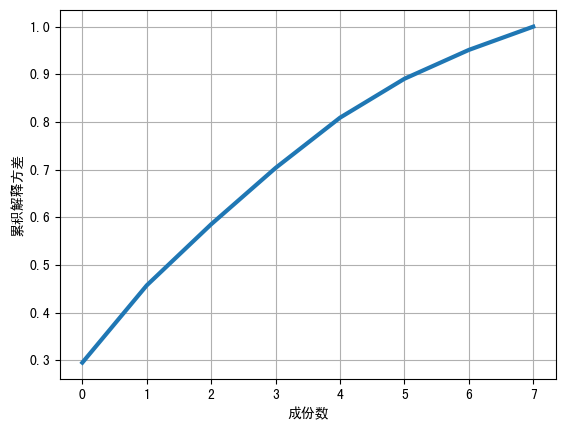

In [60]:
print(pca.explained_variance_ratio_)
# 累积解释变异程度
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('成份数')
plt.ylabel('累积解释方差'); plt.grid(True)


In [61]:

new_data = pca.fit_transform(data52) #  fit_transform 表示将生成降维后的数据
# 查看规模差别
print("原始数据集规模:   ", data52.shape)
print("降维后的数据集规模:", new_data.shape)


原始数据集规模:    (480, 8)
降维后的数据集规模: (480, 8)


新成分的结果

In [62]:
results = pd.DataFrame(pca.components_).T
results

,0,1,2,3,4,5,6,7
0,0.258648,-0.614690,-0.055370,0.308121,-0.044323,-0.483281,0.440955,-0.165188
1,-0.506480,-0.309248,0.010782,-0.020734,0.107182,0.178843,-0.193328,-0.752628
2,0.466112,-0.348979,-0.045976,0.072453,-0.123222,0.020838,-0.798492,0.019582
3,0.081033,-0.402812,0.317658,-0.826432,-0.067726,0.092865,0.145724,0.113288
4,-0.020468,0.063402,0.920658,0.271952,0.207008,-0.142239,-0.103266,0.015626
5,-0.433663,0.105414,-0.029345,-0.196191,-0.345289,-0.744692,-0.279051,0.099054
6,0.347905,0.301147,-0.125233,-0.314314,0.637814,-0.387586,-0.066600,-0.335157
7,0.378460,0.369671,0.172169,-0.071770,-0.630788,0.019362,0.128022,-0.520250
